# Importing the images

In [4]:
import os
# importing required modules 
from zipfile import ZipFile 
  
# specifying the zip file name 
file_name = "./expression_images.zip"
destination_path = './Japanese_expression' 

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
#     zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    # Checking if destination path exists or not
    if(not os.path.exists(destination_path)):
        zip.extractall(path = destination_path) 
        print('Done!')
    else:
        print("Destination Directory already exist")

Extracting all the files now...
Destination Directory already exist


In [5]:
from PIL import Image
im = Image.open('./Japanese_expression/images/KA.AN1.39.tiff')

In [6]:
import numpy as np
imarray = np.array(im)

In [7]:
import matplotlib.pyplot as plt
plt.matshow(im)
plt.show()

<Figure size 480x480 with 1 Axes>

In [8]:
import pandas as pd
data = pd.read_csv('./Japanese_expression/data.csv')

In [9]:
data.head()

,filepath,student,facial_expression
0,images/KA.AN1.39.tiff,KA,angry
1,images/KA.AN2.40.tiff,KA,angry
2,images/KA.AN3.41.tiff,KA,angry
3,images/KA.DI1.42.tiff,KA,disgust
4,images/KA.DI2.43.tiff,KA,disgust


In [10]:
data['facial_expression'].value_counts()

fear         32
sadness      31
happiness    31
angry        30
neutral      30
surprise     30
disgust      29
Name: facial_expression, dtype: int64

In [11]:
data.shape

(213, 3)

In [12]:
X = []
y = []
for i in range(213):
    path = './Japanese_expression/'+data.iloc[i][0]
    target = data.iloc[i][2]
    y.append(target)
    im = Image.open(path)
    #Reshaping 256 * 256 images to one d array of length 65536
    imarray = np.array(im).reshape(65536)
    X.append(imarray)
#     print(target)
#     plt.matshow(im)

In [13]:
print(len(X[0]))

65536


# Standardizing the data

In [14]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
from sklearn.preprocessing import LabelEncoder
expression_encoder = LabelEncoder()
y = expression_encoder.fit_transform(y)
y[0:3]

array([0, 0, 0], dtype=int64)

# Model Training

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 14)

In [17]:
from sklearn.svm import SVC
model=SVC(kernel='linear') #Default hyperparameters
model.fit(X_train,y_train)

SVC(kernel='linear')

In [18]:
model.score(X_test,y_test)

0.9302325581395349

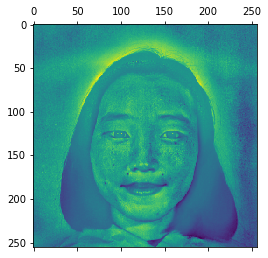

In [19]:
plt.matshow(X_test[2].reshape(256,256))

['angry'] ['neutral']


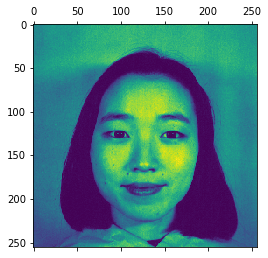

In [20]:
output = scaler.inverse_transform(X_test[2])
plt.matshow(output.reshape(256,256))
# print(y_test[0],model.predict([X_test[0]]))
actual = expression_encoder.inverse_transform([y[2]])
predicted = expression_encoder.inverse_transform(model.predict([X_test[2]]))
print(actual,predicted)

In [21]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [22]:
cr = confusion_matrix(y_test,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


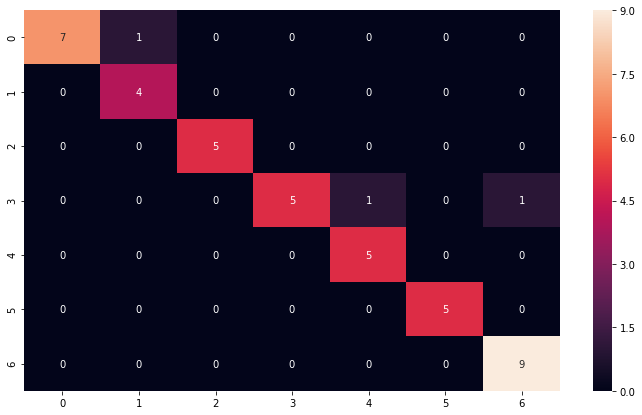

In [23]:
import seaborn as sns
plt.figure(figsize = (12,7))
sns.heatmap(cr,annot=True)
plt.show()

# Finding wrongly predicted images

In [24]:
images = []
pred_test = []
actual_test = []
for i in range(len(y_test)):
    if(y_test[i] != y_pred[i]):
        index = i
        print(y_test[i],y_pred[i])
        reverse_pred = expression_encoder.inverse_transform([y_pred[i]])
        reverse_actual = expression_encoder.inverse_transform([y_test[i]])
        pred_test.append(reverse_pred)
        actual_test.append(reverse_actual)
        reverse_train = scaler.inverse_transform(X_test[i])
        images.append(reverse_train.reshape(256,256))
    
#         plt.matshow(images[-1])
#         plt.title('Actual:'+str(y_test[i])+'   Predicted:'+str(y_pred[i]))

0 1
3 4
3 6


In [25]:
def show_images(images: list) -> None:
    n= len(images)
    print(n)
    f = plt.figure()
    num = 0
    fig = plt.figure(figsize = (20,20))
    for i in range(n):
        ax1 = fig.add_subplot(5,3,i+1)
        ax1.imshow(images[i])
        plt.title('Actual:'+str(actual_test[i])+'   Predicted:'+str(pred_test[i]))
    fig.tight_layout()
    plt.show()

3


<Figure size 432x288 with 0 Axes>

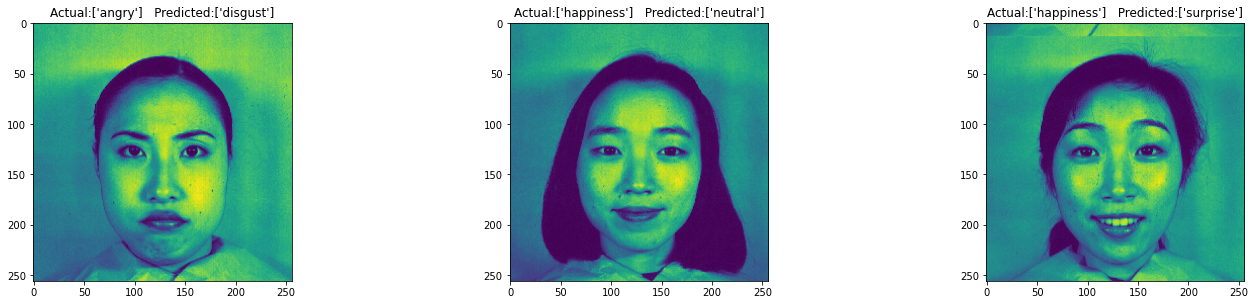

In [26]:
show_images(images)